# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [19]:
print("Min patient charge value $" +  str(np.round(np.min(medical['charges']), 2)))
print("Max patient charge value $" + str(np.round(np.max(medical['charges']), 2)))
print("Average patient charge value $" + str(np.round(np.mean(medical['charges']), 2)))
print("Median patient charge value $" + str(np.round(np.median(medical['charges']), 2)))
print("Standard deviation of patient charge values $" + str(np.round(np.std(medical['charges'], ddof=1), 2)))

Min patient charge value $1121.87
Max patient charge value $63770.43
Average patient charge value $13270.42
Median patient charge value $9382.03
Standard deviation of patient charge values $12110.01


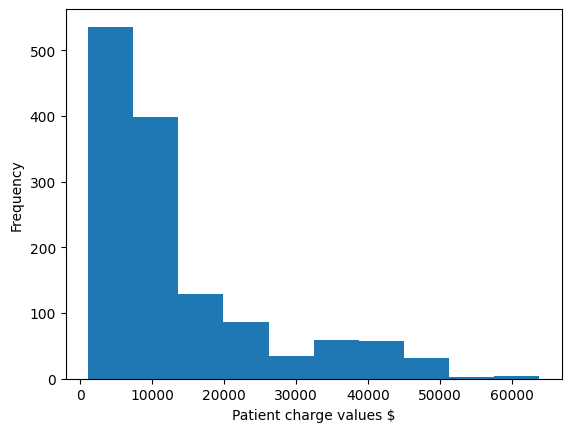

In [12]:
plt.hist(medical['charges'])
plt.xlabel("Patient charge values $")
plt.ylabel("Frequency")
plt.show()

The mean is likely biased due to the distribution being heavily skewed to the right. The median here would be a more appropriate statistic for measuring the center of the distribution.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Based on the distribution above, the average charge is \\$13,270. If assuming the data is indeed a random sample of charges, we can say the average charge has not fallen below the \\$12,000 threshold. The most appropriate frequentist test would be the t-test varient, as we are uncertain about the standard deviation of the entire population, which would be all patient charges.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

A one-sided interval would be appropriate here as the administrator is concerned about if average charges have fallen below 12,000. A two-sided interval would be appropriate if the question was about if average charges are between a certain range.

In [18]:
df = 1337
t_score = 1.96
standard_error = np.std(medical['charges'], ddof=1)/np.sqrt(df + 1)
moe = standard_error * t_score
print("Standard error:", standard_error)
print("Margin of error:", moe)

Standard error: 331.0674543156824
Margin of error: 648.8922104587375


In [20]:
upper_bound = np.mean(medical['charges']) + moe
lower_bound = np.mean(medical['charges']) - moe
print("Confidence interval: ", [str(np.round(lower_bound, 2)), str(np.round(upper_bound, 2))])

Confidence interval:  ['12621.53', '13919.31']


In [25]:
#Verifying with ttest_1samp
from scipy.stats import ttest_1samp
threshold = 12000
t_stat, p = ttest_1samp(medical['charges'], threshold, alternative='less')
print("t_statistic:", t_stat)
print("p value:", p)

t_statistic: 3.8373517196585314
p value: 0.9999349141739535


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null: The people with insurance are charged the same amount to those without.

Alternative: The people with insurance are not charged the same amount to those without.

We use the pooled test because the 2 samples are from the same sample from the above test. Thus we assume the 2 samples have the same variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [31]:
with_insurance = medical.loc[medical['insuranceclaim'] == 1, ['charges']]
with_insurance

,charges
0,16884.92400
1,1725.55230
4,3866.85520
6,8240.58960
10,2721.32080
...,...
1330,12629.16560
1331,10795.93733
1334,2205.98080
1335,1629.83350


In [32]:
without_insurance = medical.loc[medical['insuranceclaim'] == 0, ['charges']]
without_insurance

,charges
2,4449.46200
3,21984.47061
5,3756.62160
7,7281.50560
8,6406.41070
...,...
1324,4239.89265
1328,22395.74424
1332,11411.68500
1333,10600.54830


In [37]:
#Calculate the pooled standard deviation
with_size = len(with_insurance)
without_size = len(without_insurance)
with_sd = np.std(with_insurance['charges'])
without_sd = np.std(without_insurance['charges'])

pooled_sd = np.sqrt(((with_size - 1)*with_sd**2 + (without_size - 1)*without_sd**2)/(with_size + without_size - 2))
pooled_sd

np.float64(11512.282899205748)

In [38]:
#Calculate the test statistic
with_mean = np.mean(with_insurance['charges'])
without_mean = np.mean(without_insurance['charges'])

t_stat = (with_mean - without_mean)/(pooled_sd*np.sqrt(1/with_size + 1/without_size))
t_stat

np.float64(11.901306943555388)

In [40]:
p_value = 2 * (1 - t.cdf(abs(t_stat), with_size + without_size - 2))
p_value

np.float64(0.0)

In [41]:
from scipy.stats import ttest_ind
t_stat_2, p_2 = ttest_ind(with_insurance['charges'], without_insurance['charges'], equal_var=True)
print("t_statistic:", t_stat_2)
print("p value:", p_2)

t_statistic: 11.893299030876712
p value: 4.461230231620717e-31


In [42]:
#Let's try with Welch's t-test where population variance are not assumed to be equal
t_stat_3, p_3 = ttest_ind(with_insurance['charges'], without_insurance['charges'], equal_var=False)
print("t_statistic:", t_stat_3)
print("p value:", p_3)

t_statistic: 13.298031957975649
p value: 1.1105103216309125e-37


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

It does not appear scipy.stats has a ztest analog to ttest_ind or its varients. There is scipy.stats.zscore which computes the z-score from a sample. This probably is attributed to most frequentist tests being performed to be of the t varient, as in most cases the standard deviation or the mean of the population is unknown.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test